In [56]:
import numpy as np
import plotly.graph_objects as go
from scipy.optimize import minimize

# Defining Parameters
num_points = 1000
R = 5
h = 10
r = np.linspace(0,R, num_points)# Radius of the base

# Generating theta values from 0 to 2*pi
theta = np.linspace(0, 2*np.pi, num_points)

# Calculating x, y, z coordinates of the cone using parametric equations
x = r * np.cos(theta + r)
y = r * np.sin(theta + r)
z = np.linspace(0, h, num_points)

In [57]:
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(size=3))])
fig.update_layout(scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'), title='Points on a Cone')
fig.show()

In [58]:
#Adding Gausian Noise to the Data
mean = 0
std_dev = 0.05
noise_x = np.random.normal(mean, std_dev, num_points)
noise_y = np.random.normal(mean, std_dev, num_points)
noise_z = np.random.normal(mean, std_dev, num_points)

x_new = x + noise_x
y_new = y + noise_y
z_new = z + noise_z

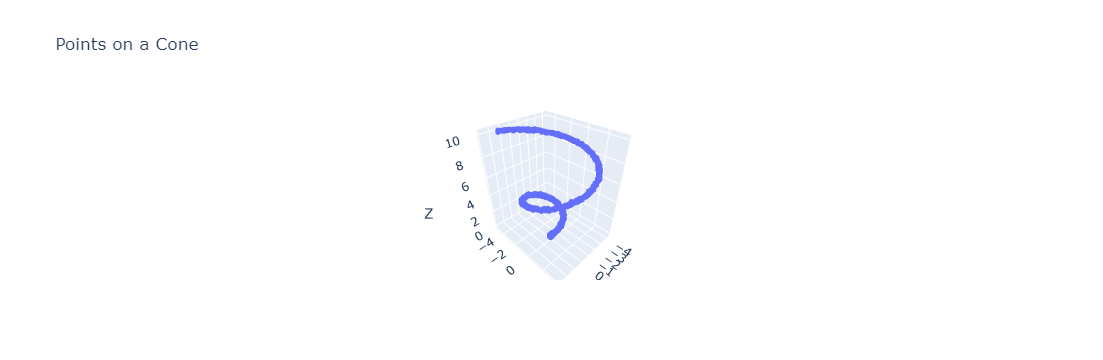

In [33]:
fig = go.Figure(data=[go.Scatter3d(x=x_new, y=y_new, z=z_new, mode='markers', marker=dict(size=3))])
fig.update_layout(scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'), title='Points on a Cone')
fig.show()

In [59]:
#Defining an error function
def error_fn(params):
    params = R,h
    x = x_new
    y = y_new
    z = z_new
    Error = np.sum((x**2 + y**2) - ((r * z / h)**2))
    return Error

In [60]:
#Finding the best fit Parameters
initial_guess = [5, 10,]

result = minimize(error_fn, initial_guess)
best_fit_radius, best_fit_height = result.x

In [61]:
# Generating best-fit cone data
theta = np.linspace(0, 2*np.pi, 1000)
v = np.linspace(0, 1, 1000)

best_fit_cone_x = best_fit_radius *v* np.cos(np.linspace(0, 2*np.pi, 1000))
best_fit_cone_y = best_fit_radius *v* np.sin(np.linspace(0, 2*np.pi, 1000))
best_fit_cone_z = np.linspace(0, best_fit_height, 1000)

In [62]:
#Plotting the plots for best fit cone, true cone, noisy cone
best_fit_cone_trace = go.Scatter3d(
    x=best_fit_cone_x,
    y=best_fit_cone_y,
    z=best_fit_cone_z,
    mode='lines',
    line=dict(
        color='green',
        width=4
    ),
    name='Best-fit Cone'
)

cone_trace = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        color='blue',
        size=3,
        opacity=0.8
    ),
    name='True Cone'
)

noisy_data_trace = go.Scatter3d(
    x=x_new,
    y=y_new,
    z=z_new,
    mode='markers',
    marker=dict(
        color='red',
        size=3,
        opacity=0.8
    ),
    name='Noisy Data'
)

fig = go.Figure(data=[cone_trace, noisy_data_trace, best_fit_cone_trace],
                layout=go.Layout(scene=dict(
                    xaxis=dict(title='X'),
                    yaxis=dict(title='Y'),
                    zaxis=dict(title='Z'),
                    aspectmode='cube'
                )))

fig.show()

In [65]:
#Calculating R-squared
r_squared = 1 - result.fun / np.sum((x_new**2 + y_new**2))
print("R-squared value:", r_squared)

R-squared value: 0.599858099422053
